<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/dev/Chapter5_NeuralNetwork/Section5.3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 5.3 - Convolutional Neural Network

This notebook contains all demo codes in Section 5.3.

The goal of this session is to help you

1. understand how to use CNN for the image classification;
2. implement CNN to empirical datasets using Keras;
3. fine tune your CNN models to achieve better performance.


![alt text](https://docs.google.com/uc?export=download&id=1oXzt8ryDo_gkzI_78jXLvSkx7qLdqqb-)



## Image Classification using Convolutional Neural Networks (CNN)

1. **Dataset**: $\mathcal{D} = (X_i, Y_i)_{i=1}^{N}$,
where
 * Input: Image Data $X$ with dimension (width, height, depth = 3).

 * Output: Objects in images $Y$ (represented in one hot vector).

2. **CNN Model**: $f_{\theta}(X, Y) = P(Y\vert X)$.

 * Input Layer: Image Data (3D tensor - (width, height, depth))

 *  Ouput Layer: A vector of the length being the number of classes (no of classes, 10).

 * Building blocks of CNNs

        (1) Convolutional Layer;

        (2) Pooling Layer;

        (3) Fully connected (Dense) Layer.


3. ** Loss Function**:
\begin{eqnarray*}
L(\theta \vert \mathcal{D})  = - \frac{1}{N}\sum_{i=1}^{N}\log P(Y_{i}\vert X_{i}) = - \frac{1}{N} \sum_{i = 1}^{N}\langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle, .
\end{eqnarray*}

  where $y_i$ is a one-hot vector.  

4. ** Optimization**:
\begin{eqnarray*}
\theta^{*} = \arg\min_{\theta} L(\theta \vert \mathcal{D}) .
\end{eqnarray*}

5. ** Prediction**:

\begin{eqnarray*}
\hat{Y}_{new} = \arg\max_{y} f_{\theta^{*}}  (X_{new}, y) .
\end{eqnarray*}

6. **Test and Validation**:  e.g. the accuracy of the estimated model, i.e.

\begin{eqnarray*}
\frac{\sum_{i=1}^{N}1(Y_{i} == \hat{Y}_{i})}{N}.
\end{eqnarray*}


## Pre-process Cifar10 Dataset

In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical #from keras.utils import to_categorical ################################ error in original code

# Import Cifar10 dataset
(x_cifar10_train, y_cifar10_train), (x_cifar10_test, y_cifar10_test) = cifar10.load_data()

# Normalize the input data
x_train = x_cifar10_train.astype('float32')/255
x_test = x_cifar10_test.astype('float32')/255

# Convert class vectors to one-hot vector matrices
num_classes = 10
y_train = to_categorical(y_cifar10_train, num_classes)
y_test = to_categorical(y_cifar10_test, num_classes)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
if True:
  print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_cifar10_train.shape, x_cifar10_test.shape)
  ntrain, ntest = 3000, 500
  x_train, y_train, x_test, y_test, x_cifar10_train, x_cifar10_test = x_train[:ntrain],  y_train[:ntrain], x_test[:ntest], y_test[:ntest], x_cifar10_train[:ntrain], x_cifar10_test[:ntest]
  print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_cifar10_train.shape, x_cifar10_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10) (50000, 32, 32, 3) (10000, 32, 32, 3)
(3000, 32, 32, 3) (3000, 10) (500, 32, 32, 3) (500, 10) (3000, 32, 32, 3) (500, 32, 32, 3)


##Implement CNN for Classification Using Lenet Architecture

**LeNet CNN Model Architecture**

![alt text](https://docs.google.com/uc?export=download&id=175hXfs1m6v3e3NRVoKN7b51aSxe06xNA)

(50000, 1)
(3000, 32, 32, 3)


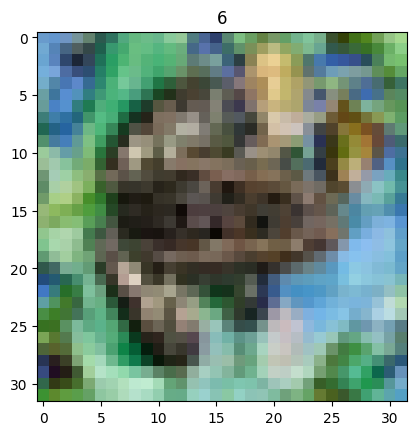

In [ ]:
import matplotlib.pyplot as plt

print(y_cifar10_train.shape)
print(x_train.shape)

i = 200
plt.imshow(x_train[i])
plt.title(y_cifar10_train[i][0])
plt.show()

In [ ]:
print("Conv2D", 64 * (3 * 3 * 3 + 1)) # 1792 64 hidden neurons * (3x3 kernel * 3 color + 1 bias) - output 30 x 30  * 64 which (2,2) pooling reduces to (15x15) * 64

print("Conv2D_1", 64 * (3 * 3 * 64 + 1))

print(64 * 6 * 6)
print("dense_6", 2304*512 + 512)
print("dense_7", 512*10 + 10)

Conv2D 1792
Conv2D_1 36928
2304
dense_6 1180160
dense_7 5130


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import SGD
import time

# Build the first LeNet model
def Lenet_Model_BaseLine(n_hidden_neurons):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add two convolutional layers and pooling layers in turn
    model.add(Input(shape=(32, 32, 3)))
    # model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32,3), activation ='relu'))
    model.add(Conv2D(n_hidden_neurons, (3, 3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_hidden_neurons, (3,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten the image data into a vector
    model.add(Flatten())
    model.add(Dense(512, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))
    # sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

n_hidden_neurons = 64
batch_size =128
epochs = 40 #3 #40

Lenet_Model = Lenet_Model_BaseLine(n_hidden_neurons)
print(Lenet_Model.summary())
hist_Lenet_Model= Lenet_Model.fit(x_train, y_train, epochs=epochs,  validation_data=(x_test, y_test), verbose=1)


Compiling Model ... 
Model compield in 0.926685094833374 seconds


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,224,010 (4.67 MB)

 Trainable params: 1,224,010 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.1043 - loss: 2.3085 - val_acc: 0.1560 - val_loss: 2.2702
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1689 - loss: 2.2624 - val_acc: 0.2160 - val_loss: 2.2257
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2208 - loss: 2.2010 - val_acc: 0.2760 - val_loss: 2.1271
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2507 - loss: 2.1019 - val_acc: 0.2900 - val_loss: 2.0309
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2822 - loss: 2.0020 - val_acc: 0.2780 - val_loss: 2.0040
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3022 - loss: 1.9582 - val_acc: 0.2920 - val_loss: 1.9804
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3202 - loss: 1.9227 - val_acc: 0.3040 - val_loss: 1.9443
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3178 - loss: 1.8743 - val_acc: 0.2840 - val_loss: 1.9280
Epoch 9/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3067 - 

In [ ]:
score = Lenet_Model.evaluate(x_test, y_test)
print(Lenet_Model.metrics_names)
print('Test ' + Lenet_Model.metrics_names[0] , score[0])
print('Test '+ Lenet_Model.metrics_names[1] , score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4837 - loss: 1.5954 
['loss', 'compile_metrics']
Test loss 1.658408522605896
Test compile_metrics 0.45399999618530273


##Plot the Fitting Result

In [ ]:
from matplotlib import pyplot as plt

def plot_hist(hist):
  for var in ['loss','acc']: # Lenet_Model.metrics_names:
    plt.figure()
    plt.plot(hist.history[var], 'b', linewidth=1.5)
    plt.plot(hist.history['val_'+var], 'r', linewidth=1.5)
    plt.legend(['Training set','Testing set'])
    plt.xlabel('Epochs')
    plt.ylabel(var[0].upper()+var[1:])

# Define functions to plot the loss and accuracy
def plot_hist_loss(hist):
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

def plot_hist_accuracy(hist):
  plt.figure()
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

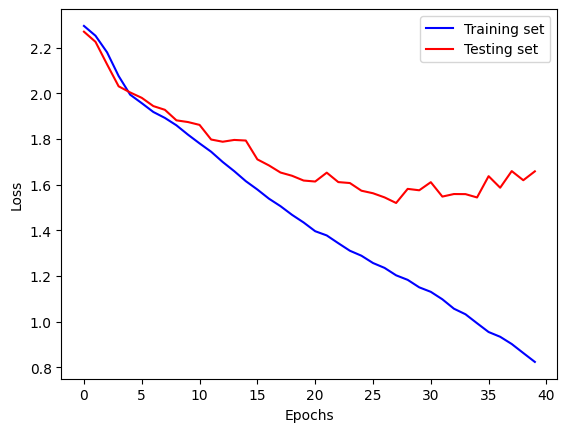

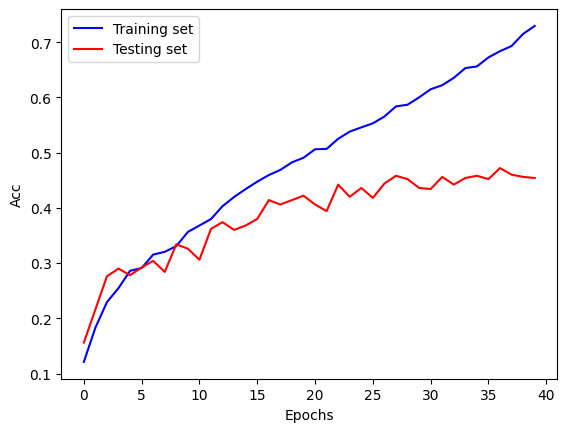

In [ ]:
plot_hist(hist_Lenet_Model)

##Some Tips to Train CNN Model

The overfitting issue might occur when applying very sophisocated CNN or other deep learning models. There are several popular ways to deal with the overfitting issue:
*   Dropout
*   Data Augmentation
*  Weight regularization

##Data Augumentation###

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation needs a large number of epochs
iterations = 391
epochs = 160 # 5 #160

datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.125, height_shift_range=0.125, fill_mode='constant',cval=0)
datagen.fit(x_train)

# start train
Lenet_da_Model  = Lenet_Model_BaseLine(n_hidden_neurons)
# hist_Lenet_da = Lenet_da_Model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
hist_Lenet_da = Lenet_da_Model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                        steps_per_epoch=iterations,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

Compiling Model ... 
Model compield in 0.049938201904296875 seconds
Epoch 1/160


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 17/391 ━━━━━━━━━━━━━━━━━━━━ 1:06 177ms/step - acc: 0.0919 - loss: 2.3016

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.0993 - loss: 2.3022 - val_acc: 0.1080 - val_loss: 2.2969
Epoch 2/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.0951 - loss: 2.2966 - val_acc: 0.1000 - val_loss: 2.2911
Epoch 3/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1110 - loss: 2.2924 - val_acc: 0.1200 - val_loss: 2.2861
Epoch 4/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.1183 - loss: 2.2879 - val_acc: 0.1280 - val_loss: 2.2814
Epoch 5/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1212 - loss: 2.2830 - val_acc: 0.1500 - val_loss: 2.2764
Epoch 6/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1346 - loss: 2.2770 - val_acc: 0.1440 - val_loss: 2.2702
Epoch 7/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1320 - loss: 2.2712 - val_acc: 0.1520 - val_loss: 2.2637
Epoch 8/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1506 - loss: 2.2644 - val_acc: 0.1720 - val_loss: 2.2542
Epoch 9/160
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 

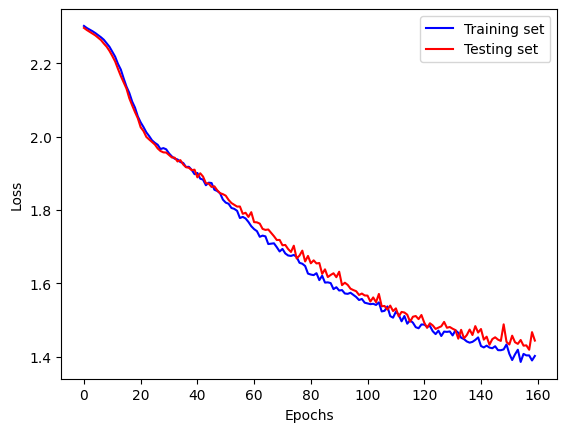

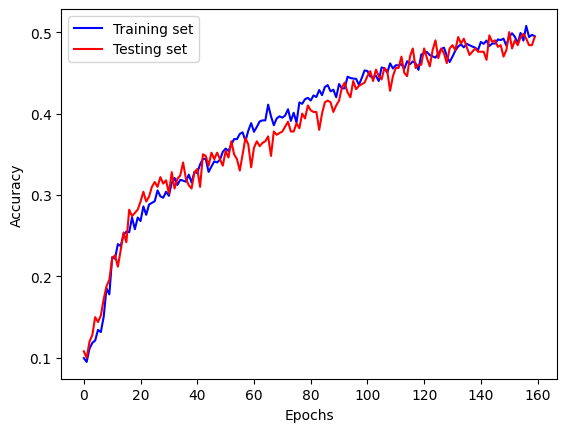

In [ ]:
plot_hist_loss(hist_Lenet_da)
plot_hist_accuracy(hist_Lenet_da)

In [ ]:
score = Lenet_da_Model.evaluate(x_test, y_test)
score[1]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5351 - loss: 1.4005 


0.49399998784065247

##Dropout




In [ ]:
from tensorflow.keras.layers import Dropout, Input
def Lenet_dp_Model(n_hidden_neurons, dropout_rate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    # model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32, 3),activation = 'relu' ))
    model.add(Conv2D(n_hidden_neurons, (3, 3),activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(n_hidden_neurons, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))

    # sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

In [ ]:


dropout_rate = 0.25
Ldp = Lenet_dp_Model(n_hidden_neurons,dropout_rate)
print(Ldp.summary())
hist_Ldp_Model= Ldp.fit(x_train, y_train, epochs=epochs,  validation_data=(x_test, y_test), verbose=1)



Compiling Model ... 
Model compield in 0.07382464408874512 seconds


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,224,010 (4.67 MB)

 Trainable params: 1,224,010 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - acc: 0.1017 - loss: 2.3151 - val_acc: 0.1140 - val_loss: 2.2820
Epoch 2/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.1459 - loss: 2.2755 - val_acc: 0.1800 - val_loss: 2.2634
Epoch 3/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1723 - loss: 2.2515 - val_acc: 0.1720 - val_loss: 2.2174
Epoch 4/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1878 - loss: 2.1870 - val_acc: 0.2580 - val_loss: 2.1559
Epoch 5/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.2278 - loss: 2.1343 - val_acc: 0.3080 - val_loss: 2.0735
Epoch 6/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.2537 - loss: 2.0662 - val_acc: 0.2720 - val_loss: 2.0281
Epoch 7/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2566 - loss: 2.0443 - val_acc: 0.2980 - val_loss: 2.0077
Epoch 8/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.2789 - loss: 1.9864 - val_acc: 0.2880 - val_loss: 1.9762
Epoch 9/160
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 

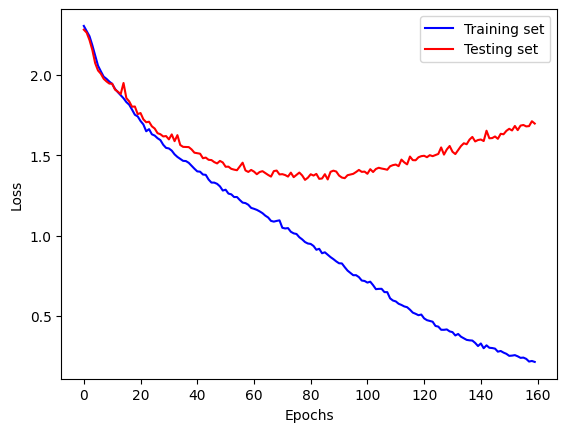

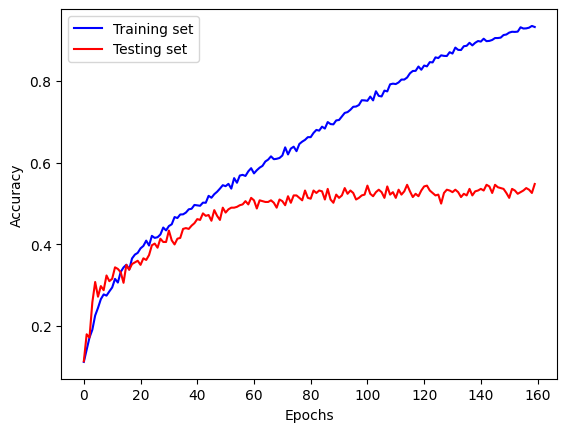

In [ ]:
plot_hist_loss(hist_Ldp_Model)
plot_hist_accuracy(hist_Ldp_Model)

Grid Search to find optimal dropout rate

In [ ]:
!pip install scikeras

from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# create model
model = KerasClassifier(model=Lenet_dp_Model , n_hidden_neurons=32, dropout_rate=0.25,  epochs=40, batch_size=128, verbose=0)
# model = KerasClassifier(model=Lenet_dp_Model , n_hidden_neurons=32, dropout_rate=0.25,  epochs=2, batch_size=128, verbose=0)
# define the grid search parameters
dropout_rate = [0.1, 0.25, 0.5]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.07868051528930664 seconds
Compiling Model ... 
Model compield in 0.07292532920837402 seconds
Compiling Model ... 
Model compield in 0.0818471908569336 seconds


Compiling Model ... 
Model compield in 0.07538485527038574 seconds
Compiling Model ... 
Model compield in 0.07671642303466797 seconds
Compiling Model ... 
Model compield in 0.0718088150024414 seconds
Compiling Model ... 
Model compield in 0.07740259170532227 seconds
Compiling Model ... 
Model compield in 0.0805196762084961 seconds
Compiling Model ... 
Model compield in 0.07365822792053223 seconds
Compiling Model ... 
Model compield in 0.07284808158874512 seconds
Compiling Model ... 
Model compield in 0.07631874084472656 seconds
Compiling Model ... 
Model compield in 0.07158708572387695 seconds
Compiling Model ... 
Model compield in 0.07117152214050293 seconds
Compiling Model ... 
Model compield in 0.747053861618042 seconds
Compiling Model ... 
Model compield in 0.07518219947814941 seconds
Compiling Model ... 
Model compield in 0.07572770118713379 seconds
Best: 0.319000 using {'dropout_rate': 0.1}
0.319000 (0.012184) with: {'dropout_rate': 0.1}
0.292667 (0.012979) with: {'dropout_rate':

##Weight Regularization ###

In [ ]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Conv2D, Input
from scikeras.wrappers import KerasClassifier
from keras import regularizers

def Lenet_Model_WeightRegularization (regRate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    # model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(Input(shape=(32, 32, 3)))   ######################
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l1(regRate), activation = 'relu'))
    model.add(Dense(10, activation ='softmax'))

    # sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

model = KerasClassifier(model=Lenet_Model_WeightRegularization, epochs = 40, batch_size=128, regRate=0.1)
# model = KerasClassifier(model=Lenet_Model_WeightRegularization, epochs = 4, batch_size=128, regRate=0.1)

param_grid = dict(regRate = [0.00001, 0.001, 0.002])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.0572056770324707 seconds
Epoch 1/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.1149 - loss: 2.5888
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1367 - loss: 2.5787
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1640 - loss: 2.5667
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1640 - loss: 2.5635
Epoch 5/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.1528 - loss: 2.5552
Epoch 6/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1805 - loss: 2.5474
Epoch 7/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.1853 - loss: 2.5380
Epoch 8/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.1868 - loss: 2.5306
Epoch 9/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.1880 - loss: 2.5226
Epoch 10/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2161 - loss: 2.5075
Epoch 11/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2324 - loss: 2.4929
Epoch 12/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.23

Useful Link:  [How to Grid Search Hyperparameters](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

## Other Aspects

The sucess of the optimization scheme depends on several aspects:

    Data - Normalization.
    Optimizor
    Parameter initialization


###Normalization###

[Keras link](https://keras.io/layers/normalization/)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation, Input
import time
def Lenet_Model_batch_norm():
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    # model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    # sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Compiling Model ... 
Model compield in 0.12426376342773438 seconds


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_35 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,986 (4.77 MB)

 Trainable params: 1,250,922 (4.77 MB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - acc: 0.1082 - loss: 2.5193 - val_acc: 0.0940 - val_loss: 4.0357
Epoch 2/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.1092 - loss: 2.4836 - val_acc: 0.1000 - val_loss: 2.8942
Epoch 3/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.1109 - loss: 2.4176 - val_acc: 0.1040 - val_loss: 2.5147
Epoch 4/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - acc: 0.1201 - loss: 2.3826 - val_acc: 0.1040 - val_loss: 2.3983
Epoch 5/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.1122 - loss: 2.3642 - val_acc: 0.0940 - val_loss: 2.3553
Epoch 6/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc: 0.1101 - loss: 2.3473 - val_acc: 0.0840 - val_loss: 2.3346
Epoch 7/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - acc: 0.1176 - loss: 2.3401 - val_acc: 0.0820 - val_loss: 2.3199
Epoch 8/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc: 0.1157 - loss: 2.3210 - val_acc: 0.0800 - val_loss: 2.3090
Epoch 9/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - acc: 0.1123 - lo

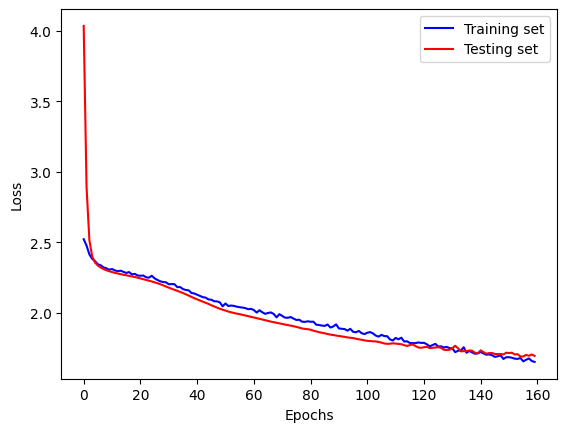

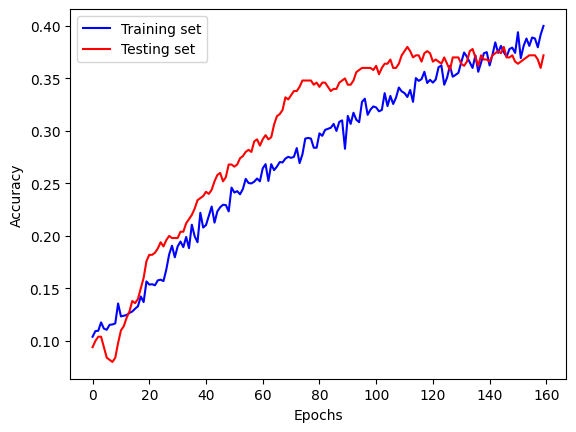

In [ ]:
Lenet_Model_batch_norm1 = Lenet_Model_batch_norm()
print(Lenet_Model_batch_norm1.summary())

hist_Lenet_Model_batch_norm = Lenet_Model_batch_norm1.fit(x_cifar10_train, y_train, epochs=epochs, batch_size = 1024, validation_data=(x_cifar10_test, y_test), verbose=1)
plot_hist_loss(hist_Lenet_Model_batch_norm)
plot_hist_accuracy(hist_Lenet_Model_batch_norm)

###Optimizer###

Optimizor

   1.  Method, e.g. SGD, Adam...
   
   2. Related Parameters, .e.g batch_size, epochs...

[Keras Link](https://keras.io/optimizers/)

Popular optimazation methods include:

1.   Stochastic Grid Descent(SGD);
2.   Adaptive Gradient Algorithm (AdaGrad);
3.   Root Mean Square Propagation (RMSProp)

More information can be found in  [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).


In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD # from keras.optimizers import RMSprop, SGD  ##############################

In [ ]:
from datetime import datetime

# Get and print the current time
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Current time:", current_time)

Current time: 2024-09-30 02:56:46


${\color{red}Homework}$: Use GridSearch to try out different optimization methods and choose the best one.  

###Weight initialization ###

[Keras Link](https://keras.io/initializers/)

init = ['glorot_uniform', 'normal', 'uniform']


${\color{red}Homework}$: Use GridSearch to try out different weight initialziation methods and choose the best one.  

# Future Work

[Rodrigo Benenson's Blog](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)


![alt text](https://docs.google.com/uc?export=download&id=1gbnaifDszhZ9ivWx4hWob93XGAp5o4kb)
